# Project 1 - MTA Turnstile  
#### Team: Ting, Laura, Elaine, Taichi

### Data import, clean and standardise

In [662]:
# import required modules

from __future__ import division

import csv
import collections
from dateutil.parser import parser
import datetime
import csv
import os

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [663]:
# check
os.getcwd()

'/Users/THoshino/Desktop/METIS/IN CLASS/WEEK 1/group_task/mta-turnstile'

In [664]:
# download txt file into current working directly
!curl -O http://web.mta.info/developers/data/nyct/turnstile/turnstile_160507.txt
!curl -O http://web.mta.info/developers/data/nyct/turnstile/turnstile_160514.txt
!curl -O http://web.mta.info/developers/data/nyct/turnstile/turnstile_160521.txt
!curl -O http://web.mta.info/developers/data/nyct/turnstile/turnstile_160528.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 24.2M    0 24.2M    0     0  4879k      0 --:--:--  0:00:05 --:--:-- 6436k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 24.2M    0 24.2M    0     0  7466k      0 --:--:--  0:00:03 --:--:-- 7466k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 24.1M    0 24.1M    0     0  5621k      0 --:--:--  0:00:04 --:--:-- 5623k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 24.4M    0 24.4M    0     0  7016k      0 --:--:--  0:00:03 --:--:-- 7015k


In [665]:
# open MTA turnstile data

with open('turnstile_160507.txt') as f:
    turnstiles1 = pd.read_csv(f)
with open('turnstile_160514.txt') as f:
    turnstiles2 = pd.read_csv(f)
with open('turnstile_160521.txt') as f:
    turnstiles3 = pd.read_csv(f)
with open('turnstile_160528.txt') as f:
    turnstiles4 = pd.read_csv(f)

In [666]:
# concatenate all four file objects vertically

turnstile_df = pd.concat([turnstiles1, turnstiles2, turnstiles3, turnstiles4], ignore_index = True)

In [667]:
# check
list(turnstile_df.columns.values)

['C/A',
 'UNIT',
 'SCP',
 'STATION',
 'LINENAME',
 'DIVISION',
 'DATE',
 'TIME',
 'DESC',
 'ENTRIES',
 'EXITS                                                               ']

In [668]:
# strip trailing spaces from values
# create a new column for datetime

turnstile_df.columns = turnstile_df.columns.str.strip()
turnstile_df['DATETIME'] = turnstile_df['DATE'] + ' ' + turnstile_df['TIME']

In [770]:
# convert datetime string to datetime object

turnstile_df['DATETIME'] = turnstile_df['DATETIME'].apply(parser)

TypeError: 'tuple' object is not callable

In [670]:
# add a new column 'dayofweek' notated 0 = Monday => 6 = Sunday
# takes lots of time!

m =turnstile_df['DATE']
turnstile_df['dayofweek'] = pd.to_datetime(m).dt.dayofweek

In [671]:
# check
list(turnstile_df.columns.values)

['C/A',
 'UNIT',
 'SCP',
 'STATION',
 'LINENAME',
 'DIVISION',
 'DATE',
 'TIME',
 'DESC',
 'ENTRIES',
 'EXITS',
 'DATETIME',
 'dayofweek']

In [672]:
# create new column that conc

turnstile_df['STATIONLINE'] = turnstile_df['STATION'] + turnstile_df['LINENAME']

In [673]:
# check
turnstile_df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,dayofweek,STATIONLINE
0,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,00:00:00,REGULAR,5639941,1909983,<dateutil.parser.parser object at 0x1590495d0>,5,59 STNQR456
1,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,04:00:00,REGULAR,5639991,1909993,<dateutil.parser.parser object at 0x159049190>,5,59 STNQR456
2,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,08:00:00,REGULAR,5640014,1910024,<dateutil.parser.parser object at 0x159049c90>,5,59 STNQR456
3,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,12:00:00,REGULAR,5640158,1910134,<dateutil.parser.parser object at 0x138e04f10>,5,59 STNQR456
4,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,16:00:00,REGULAR,5640454,1910197,<dateutil.parser.parser object at 0x158f5c690>,5,59 STNQR456
5,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,20:00:00,REGULAR,5640802,1910254,<dateutil.parser.parser object at 0x158f5c790>,5,59 STNQR456
6,A002,R051,02-00-00,59 ST,NQR456,BMT,05/01/2016,00:00:00,REGULAR,5640974,1910328,<dateutil.parser.parser object at 0x14ca93590>,6,59 STNQR456
7,A002,R051,02-00-00,59 ST,NQR456,BMT,05/01/2016,04:00:00,REGULAR,5640996,1910333,<dateutil.parser.parser object at 0x13b086890>,6,59 STNQR456
8,A002,R051,02-00-00,59 ST,NQR456,BMT,05/01/2016,08:00:00,REGULAR,5641021,1910358,<dateutil.parser.parser object at 0x13a4e4490>,6,59 STNQR456
9,A002,R051,02-00-00,59 ST,NQR456,BMT,05/01/2016,12:00:00,REGULAR,5641113,1910427,<dateutil.parser.parser object at 0x14ca9ba90>,6,59 STNQR456


In [772]:
turnstile_df.shape

(777938, 17)

In [674]:
# create groupby for turnstile level data by day of week and slot of day

test = turnstile_df.groupby(['STATIONLINE', 'C/A', 'UNIT', 'SCP'])

In [675]:
# add new columns calculated from incremental change vs. previous day's volumes

turnstile_df['net_in'] = test['ENTRIES'].transform(pd.Series.diff)
turnstile_df['net_out'] = test['EXITS'].transform(pd.Series.diff)

In [676]:
# check for outliers
foo = turnstile_df['net_in']
print len(foo[foo>5000])
print len(foo[foo<-5000])

96
105


In [677]:
# replace outliers with np.nan

turnstile_df[turnstile_df['net_in']>5000] = np.nan
turnstile_df[turnstile_df['net_in']<-5000] = np.nan
turnstile_df[turnstile_df['net_out']>5000] = np.nan
turnstile_df[turnstile_df['net_out']<-5000] = np.nan

In [678]:
# take the absolute value of all values

turnstile_df['net_in'] = np.abs(turnstile_df['net_in'])
turnstile_df['net_out'] = np.abs(turnstile_df['net_out'])

In [679]:
# check
turnstile_df
foo_in = turnstile_df['net_in']
print len(foo_in[foo_in>5000])
print len(foo_in[foo_in<-5000])
print len(foo_in[foo_in<0])
foo_out = turnstile_df['net_out']
print len(foo_out[foo_out>5000])
print len(foo_out[foo_out<-5000])
print len(foo_out[foo_out<0])

0
0
0
0
0
0


In [680]:
# add a new column that is the sum of entries and exits

turnstile_df['net_sum'] = turnstile_df['net_in']+ turnstile_df['net_out']

In [681]:
# check
list(turnstile_df.columns.values)

['C/A',
 'UNIT',
 'SCP',
 'STATION',
 'LINENAME',
 'DIVISION',
 'DATE',
 'TIME',
 'DESC',
 'ENTRIES',
 'EXITS',
 'DATETIME',
 'dayofweek',
 'STATIONLINE',
 'net_in',
 'net_out',
 'net_sum']

In [682]:
# create new Series with values grouped by stationline and day of week for entries, exits and total

daily_entry = turnstile_df.groupby(['STATIONLINE', 'dayofweek'])['net_in'].sum()
daily_exit = turnstile_df.groupby(['STATIONLINE', 'dayofweek'])['net_out'].sum()
daily_total = turnstile_df.groupby(['STATIONLINE', 'dayofweek'])['net_sum'].sum()

In [683]:
# check
type(daily_total)

pandas.core.series.Series

In [684]:
# reset index for each of the Series

daily_entry = daily_entry.reset_index()
daily_exit = daily_exit.reset_index()
daily_total = daily_total.reset_index()

In [685]:
# check
type(daily_entry)

pandas.core.frame.DataFrame

In [686]:
# check
daily_entry

,STATIONLINE,dayofweek,net_in
0,1 AVL,0.0,90124.0
1,1 AVL,1.0,98424.0
2,1 AVL,2.0,101540.0
3,1 AVL,3.0,102213.0
4,1 AVL,4.0,104350.0
5,1 AVL,5.0,79365.0
6,1 AVL,6.0,67660.0
7,103 ST-CORONA7,0.0,81666.0
8,103 ST-CORONA7,1.0,81824.0
9,103 ST-CORONA7,2.0,83832.0


In [687]:
# check
daily_exit

,STATIONLINE,dayofweek,net_out
0,1 AVL,0.0,93861.0
1,1 AVL,1.0,98585.0
2,1 AVL,2.0,102308.0
3,1 AVL,3.0,101739.0
4,1 AVL,4.0,106652.0
5,1 AVL,5.0,81014.0
6,1 AVL,6.0,70562.0
7,103 ST-CORONA7,0.0,53590.0
8,103 ST-CORONA7,1.0,58793.0
9,103 ST-CORONA7,2.0,58779.0


In [688]:
# check
daily_total

,STATIONLINE,dayofweek,net_sum
0,1 AVL,0.0,183985.0
1,1 AVL,1.0,197009.0
2,1 AVL,2.0,203848.0
3,1 AVL,3.0,203952.0
4,1 AVL,4.0,211002.0
5,1 AVL,5.0,160379.0
6,1 AVL,6.0,138222.0
7,103 ST-CORONA7,0.0,135256.0
8,103 ST-CORONA7,1.0,140617.0
9,103 ST-CORONA7,2.0,142611.0


In [689]:
# create new Series of entries and exits grouped only by station

total_entry = turnstile_df.groupby(['STATIONLINE'])['net_in'].sum()
total_exit = turnstile_df.groupby(['STATIONLINE'])['net_out'].sum()

In [690]:
#check
type(total_entry)

pandas.core.series.Series

In [691]:
# concatenate Series vertically to create a new datatable with total entries, total exits and a third column total

total_entex = total_entry.add(total_exit)
summary = pd.concat([total_entry, total_exit, total_entex], axis=1)

In [692]:
# rename the column headers

summary.columns = ['total_entry', 'total_exit', 'total_entex']

In [693]:
# reset the index

summary = summary.reset_index()

In [694]:
# check
summary.head(10)

,STATIONLINE,total_entry,total_exit,total_entex
0,1 AVL,643676.0,654721.0,1298397.0
1,103 ST-CORONA7,517351.0,378553.0,895904.0
2,103 ST1,317628.0,145532.0,463160.0
3,103 ST6,292701.0,148108.0,440809.0
4,103 STBC,125673.0,90333.0,216006.0
5,104 STA,48782.0,18405.0,67187.0
6,104 STJZ,69397.0,39378.0,108775.0
7,110 ST6,367971.0,285362.0,653333.0
8,111 ST7,299632.0,194300.0,493932.0
9,111 STA,57137.0,19769.0,76906.0


In [695]:
# sort the list by total entex

topten = summary.sort_values(by = ['total_entex'], ascending = False).head(10)

In [696]:
#
summary_total.head(10)

,STATIONLINE,total_entry,total_exit,total_entex,total_normalized,entries_normalized,exits_normalized,p_total,p_entry,p_exit
309,GRD CNTRL-42 ST4567S,3595735.0,3189203.0,6784938.0,0.026176,0.024271,0.028717,0.026176,0.024271,0.028717
90,34 ST-HERALD SQBDFMNQR,3075106.0,2719448.0,5794554.0,0.022355,0.020757,0.024487,0.022355,0.020757,0.024487
442,TIMES SQ-42 ST1237ACENQRS,2201280.0,1828654.0,4029934.0,0.015547,0.014859,0.016466,0.015547,0.014859,0.016466
103,42 ST-PORT AUTHACENQRS1237,2281541.0,1523053.0,3804594.0,0.014678,0.015400,0.013714,0.014678,0.015400,0.013714
94,34 ST-PENN STAACE,2000576.0,1796636.0,3797212.0,0.014649,0.013504,0.016178,0.014649,0.013504,0.016178
25,14 ST-UNION SQLNQR456,1873490.0,1597535.0,3471025.0,0.013391,0.012646,0.014385,0.013391,0.012646,0.014385
156,86 ST456,1665105.0,1527236.0,3192341.0,0.012316,0.011239,0.013752,0.012316,0.011239,0.013752
107,47-50 STS ROCKBDFM,1417379.0,1474204.0,2891583.0,0.011156,0.009567,0.013274,0.011156,0.009567,0.013274
286,FLUSHING-MAIN7,1556444.0,1241369.0,2797813.0,0.010794,0.010506,0.011178,0.010794,0.010506,0.011178
123,59 ST COLUMBUSABCD1,1528813.0,1184572.0,2713385.0,0.010468,0.010320,0.010666,0.010468,0.010320,0.010666


In [697]:
# check
toptwenty = summary.sort_values(by = ['total_entex'], ascending = False).head(20)

In [698]:
# Create a list of top 10 stations

list(topten['STATIONLINE'])

['GRD CNTRL-42 ST4567S',
 '34 ST-HERALD SQBDFMNQR',
 'TIMES SQ-42 ST1237ACENQRS',
 '42 ST-PORT AUTHACENQRS1237',
 '34 ST-PENN STAACE',
 '14 ST-UNION SQLNQR456',
 '86 ST456',
 '47-50 STS ROCKBDFM',
 'FLUSHING-MAIN7',
 '59 ST COLUMBUSABCD1']

In [699]:
# assign the list of names of top 10 stations to a variable

topstation_name = ['GRD CNTRL-42 ST (4567S)',
 '34 ST-HERALD SQ (BDFMNQR)',
 'TIMES SQ-42 ST (1237ACENQRS)',
 '42 ST-PORT AUTH (ACENQRS1237)',
 '34 ST-PENN STA (ACE)',
 '14 ST-UNION SQ (LNQR456)',
 '86 ST (456)',
 '47-50 STS ROCK (BDFM)',
 'FLUSHING-MAIN (7)',
 '59 ST COLUMBUS (ABCD1)']

In [700]:
# assign list of top 10 stations to a variable

topstation = list(topten['STATIONLINE'])

In [701]:
# reverse the order of the topten entries and totals

t_en = numpy.array(topten['total_entry'])[::-1]
t = numpy.array(topten['total_entex'])[::-1]

In [702]:
### Laura's section

In [703]:
summary1 = summary.copy()

In [704]:
summary_total = summary1.sort_values(by = 'total_entex', ascending = False)

In [705]:
summary_total.head(10)

,STATIONLINE,total_entry,total_exit,total_entex
309,GRD CNTRL-42 ST4567S,3606847.0,3194237.0,6801084.0
90,34 ST-HERALD SQBDFMNQR,3079692.0,2719583.0,5799275.0
442,TIMES SQ-42 ST1237ACENQRS,2201328.0,1828694.0,4030022.0
103,42 ST-PORT AUTHACENQRS1237,2281541.0,1523053.0,3804594.0
94,34 ST-PENN STAACE,2002397.0,1798088.0,3800485.0
25,14 ST-UNION SQLNQR456,1873490.0,1597535.0,3471025.0
156,86 ST456,1667180.0,1532008.0,3199188.0
107,47-50 STS ROCKBDFM,1419826.0,1474352.0,2894178.0
286,FLUSHING-MAIN7,1556444.0,1241369.0,2797813.0
123,59 ST COLUMBUSABCD1,1528813.0,1184572.0,2713385.0


In [706]:
summary_total.sum()

STATIONLINE    GRD CNTRL-42 ST4567S34 ST-HERALD SQBDFMNQRTIME...
total_entry                                          1.48235e+08
total_exit                                           1.11185e+08
total_entex                                           2.5942e+08
dtype: object

In [707]:
total_entries = summary_total.sum()[1]
total_exits = summary_total.sum()[2]
total_overall_traffic = summary_total.sum()[3]

In [708]:
print total_entries
print total_exits
print total_overall_traffic

148235327.0
111184660.0
259419987.0


In [709]:
summary_total['total_normalized'] = summary_total['total_entex']/total_overall_traffic
summary_total['entries_normalized'] = summary_total['total_entry']/total_entries
summary_total['exits_normalized'] = summary_total['total_exit']/total_exits

In [710]:
summary_total.columns

Index([u'STATIONLINE', u'total_entry', u'total_exit', u'total_entex',
       u'total_normalized', u'entries_normalized', u'exits_normalized'],
      dtype='object')

In [711]:
summary_total['p_total'] = summary_total['total_entex']/total_overall_traffic
summary_total['p_entry'] = summary_total['total_entry']/total_entries
summary_total['p_exit'] = summary_total['total_exit']/total_exits

In [712]:
summary_total.head()

,STATIONLINE,total_entry,total_exit,total_entex,total_normalized,entries_normalized,exits_normalized,p_total,p_entry,p_exit
309,GRD CNTRL-42 ST4567S,3606847.0,3194237.0,6801084.0,0.026216,0.024332,0.028729,0.026216,0.024332,0.028729
90,34 ST-HERALD SQBDFMNQR,3079692.0,2719583.0,5799275.0,0.022355,0.020776,0.024460,0.022355,0.020776,0.024460
442,TIMES SQ-42 ST1237ACENQRS,2201328.0,1828694.0,4030022.0,0.015535,0.014850,0.016447,0.015535,0.014850,0.016447
103,42 ST-PORT AUTHACENQRS1237,2281541.0,1523053.0,3804594.0,0.014666,0.015391,0.013698,0.014666,0.015391,0.013698
94,34 ST-PENN STAACE,2002397.0,1798088.0,3800485.0,0.014650,0.013508,0.016172,0.014650,0.013508,0.016172


In [713]:
by_stationline_norm = summary_total[['STATIONLINE', 'total_normalized', 'entries_normalized', 'exits_normalized']]

In [714]:
cumulative = by_stationline_norm.cumsum(axis=None, dtype=None, out=None, skipna=True)

In [715]:
cumulative['STATIONLINE'] = by_stationline_norm['STATIONLINE']

In [716]:
cumulative.head(10)

,STATIONLINE,total_normalized,entries_normalized,exits_normalized
309,GRD CNTRL-42 ST4567S,0.0262165,0.0243319,0.0287291
90,34 ST-HERALD SQBDFMNQR,0.0485713,0.0451076,0.0531892
442,TIMES SQ-42 ST1237ACENQRS,0.064106,0.0599578,0.0696365
103,42 ST-PORT AUTHACENQRS1237,0.0787718,0.0753492,0.0833349
94,34 ST-PENN STAACE,0.0934217,0.0888574,0.099507
25,14 ST-UNION SQLNQR456,0.106802,0.101496,0.113875
156,86 ST456,0.119134,0.112743,0.127654
107,47-50 STS ROCKBDFM,0.13029,0.122321,0.140915
286,FLUSHING-MAIN7,0.141075,0.132821,0.15208
123,59 ST COLUMBUSABCD1,0.151534,0.143134,0.162734


In [717]:
names = cumulative.columns.tolist()
names

['STATIONLINE', 'total_normalized', 'entries_normalized', 'exits_normalized']

In [718]:
names[names.index('total_normalized')] = 'total_cumulative'
names[names.index('entries_normalized')] = 'entries_cumulative'
names[names.index('exits_normalized')] = 'exits_cumulative'

cumulative.columns = names

In [719]:
cumulative.head(10)

,STATIONLINE,total_cumulative,entries_cumulative,exits_cumulative
309,GRD CNTRL-42 ST4567S,0.0262165,0.0243319,0.0287291
90,34 ST-HERALD SQBDFMNQR,0.0485713,0.0451076,0.0531892
442,TIMES SQ-42 ST1237ACENQRS,0.064106,0.0599578,0.0696365
103,42 ST-PORT AUTHACENQRS1237,0.0787718,0.0753492,0.0833349
94,34 ST-PENN STAACE,0.0934217,0.0888574,0.099507
25,14 ST-UNION SQLNQR456,0.106802,0.101496,0.113875
156,86 ST456,0.119134,0.112743,0.127654
107,47-50 STS ROCKBDFM,0.13029,0.122321,0.140915
286,FLUSHING-MAIN7,0.141075,0.132821,0.15208
123,59 ST COLUMBUSABCD1,0.151534,0.143134,0.162734


In [720]:
len(cumulative1['STATIONLINE'])

470

In [721]:
from __future__ import division
to_470 = np.arange(1, len(cumulative1['STATIONLINE']) + 1)/len(cumulative1['STATIONLINE'])

In [722]:
cumulative1.tail()

,STATIONLINE,total_normalized,entries_normalized,exits_normalized
201,BEACH 98 STAS,total_cumulative,0.999758,0.999912
444,TOMPKINSVILLE1,total_cumulative,0.9999,0.999912
194,BEACH 105 STAS,total_cumulative,0.999947,0.999979
218,BROAD CHANNELAS,total_cumulative,1,1
394,ORCHARD BEACH6,total_cumulative,1,1


In [723]:
## Elaine's section

In [724]:
# deep copy weekday_data

weekday_data1 = weekday_data.copy()

In [725]:
weekday_data1['st2']=weekday_data['STATIONLINE']

In [726]:
# check
weekday_data1

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,dayofweek,STATIONLINE,net_in,net_out,net_sum,st2
12,A002,R051,02-00-00,59 ST,NQR456,BMT,05/02/2016,00:00:00,REGULAR,5641703.0,1910577.0,<dateutil.parser.parser object at 0x1143f9390>,0.0,59 STNQR456,106.0,20.0,126.0,59 STNQR456
13,A002,R051,02-00-00,59 ST,NQR456,BMT,05/02/2016,04:00:00,REGULAR,5641718.0,1910578.0,<dateutil.parser.parser object at 0x1143f93d0>,0.0,59 STNQR456,15.0,1.0,16.0,59 STNQR456
14,A002,R051,02-00-00,59 ST,NQR456,BMT,05/02/2016,08:00:00,REGULAR,5641752.0,1910687.0,<dateutil.parser.parser object at 0x1143f9410>,0.0,59 STNQR456,34.0,109.0,143.0,59 STNQR456
15,A002,R051,02-00-00,59 ST,NQR456,BMT,05/02/2016,12:00:00,REGULAR,5641930.0,1910980.0,<dateutil.parser.parser object at 0x1143f9210>,0.0,59 STNQR456,178.0,293.0,471.0,59 STNQR456
16,A002,R051,02-00-00,59 ST,NQR456,BMT,05/02/2016,16:00:00,REGULAR,5642221.0,1911045.0,<dateutil.parser.parser object at 0x1143f9510>,0.0,59 STNQR456,291.0,65.0,356.0,59 STNQR456
17,A002,R051,02-00-00,59 ST,NQR456,BMT,05/02/2016,20:00:00,REGULAR,5643166.0,1911119.0,<dateutil.parser.parser object at 0x1143f9910>,0.0,59 STNQR456,945.0,74.0,1019.0,59 STNQR456
18,A002,R051,02-00-00,59 ST,NQR456,BMT,05/03/2016,00:00:00,REGULAR,5643422.0,1911159.0,<dateutil.parser.parser object at 0x1143f95d0>,1.0,59 STNQR456,256.0,40.0,296.0,59 STNQR456
19,A002,R051,02-00-00,59 ST,NQR456,BMT,05/03/2016,04:00:00,REGULAR,5643435.0,1911165.0,<dateutil.parser.parser object at 0x1143f9a90>,1.0,59 STNQR456,13.0,6.0,19.0,59 STNQR456
20,A002,R051,02-00-00,59 ST,NQR456,BMT,05/03/2016,08:00:00,REGULAR,5643481.0,1911317.0,<dateutil.parser.parser object at 0x1143f9990>,1.0,59 STNQR456,46.0,152.0,198.0,59 STNQR456
21,A002,R051,02-00-00,59 ST,NQR456,BMT,05/03/2016,12:00:00,REGULAR,5643674.0,1911609.0,<dateutil.parser.parser object at 0x1143f9cd0>,1.0,59 STNQR456,193.0,292.0,485.0,59 STNQR456


In [727]:
# filter out stations that are not in topstations

weekday_data_top = weekday_data1[weekday_data1['st2'].isin(topstation)]

In [728]:
# create Series for each of the relevant columns

m1 = weekday_data_top['STATIONLINE']
m2 = weekday_data_top['TIME']
m3 = weekday_data_top['net_sum']

In [729]:
# check
type(m1)

pandas.core.series.Series

In [730]:
# concatenate the three columns vertically

m_new = pd.concat([m1, m2, m3], axis=1)

In [731]:
# standardise time slots into inclusive time slots i.e. 0-4pm shifts to 1-5pm

hslot = []
h= []
for i in m_new['TIME']:
    i = str(i)
    hour = int(i[:2])
    if hour == 0 or hour ==1:
        hslot.append(6)
    elif hour > 1 and hour <= 5:
        hslot.append(1)
    elif hour <= 9:
        hslot.append(2)
    elif hour <= 13:
        hslot.append(3)
    elif hour <= 17:
        hslot.append(4)
    elif hour <= 21:
        hslot.append(5)
    else:
        hslot.append(6)

In [732]:
# add a new column to dataframe

m_new['hslot'] = hslot

In [733]:
# assign grouped dataframe to variable

stationbyhour = m_new.groupby(['STATIONLINE', 'hslot'])['net_sum'].sum()

In [734]:
# reset index on grouped dataframe to flatten file

stationbyhour = stationbyhour.reset_index()

In [735]:
# check
stationbyhour

,STATIONLINE,hslot,net_sum
0,14 ST-UNION SQLNQR456,1,23128.0
1,14 ST-UNION SQLNQR456,2,368218.0
2,14 ST-UNION SQLNQR456,3,554757.0
3,14 ST-UNION SQLNQR456,4,690748.0
4,14 ST-UNION SQLNQR456,5,866657.0
5,14 ST-UNION SQLNQR456,6,254734.0
6,34 ST-HERALD SQBDFMNQR,1,60474.0
7,34 ST-HERALD SQBDFMNQR,2,366805.0
8,34 ST-HERALD SQBDFMNQR,3,1188563.0
9,34 ST-HERALD SQBDFMNQR,4,929980.0


In [736]:
# Add new columns to stationbyhour dataframe

stationbyhour['Time Slot (Hours)'] = stationbyhour['hslot']
stationbyhour['Station'] = stationbyhour['STATIONLINE']
stationbyhour['Sum'] = stationbyhour['net_sum']/1000000

In [737]:
# check
stationbyhour

,STATIONLINE,hslot,net_sum,Time Slot (Hours),Station,Sum
0,14 ST-UNION SQLNQR456,1,23128.0,1,14 ST-UNION SQLNQR456,0.023128
1,14 ST-UNION SQLNQR456,2,368218.0,2,14 ST-UNION SQLNQR456,0.368218
2,14 ST-UNION SQLNQR456,3,554757.0,3,14 ST-UNION SQLNQR456,0.554757
3,14 ST-UNION SQLNQR456,4,690748.0,4,14 ST-UNION SQLNQR456,0.690748
4,14 ST-UNION SQLNQR456,5,866657.0,5,14 ST-UNION SQLNQR456,0.866657
5,14 ST-UNION SQLNQR456,6,254734.0,6,14 ST-UNION SQLNQR456,0.254734
6,34 ST-HERALD SQBDFMNQR,1,60474.0,1,34 ST-HERALD SQBDFMNQR,0.060474
7,34 ST-HERALD SQBDFMNQR,2,366805.0,2,34 ST-HERALD SQBDFMNQR,0.366805
8,34 ST-HERALD SQBDFMNQR,3,1188563.0,3,34 ST-HERALD SQBDFMNQR,1.188563
9,34 ST-HERALD SQBDFMNQR,4,929980.0,4,34 ST-HERALD SQBDFMNQR,0.929980


In [738]:
# run a pivot table on the station to display volume by timeslot for weekday

stationbyhour_piv = stationbyhour.pivot_table(values = 'Sum', index = 'Station', columns = 'Time Slot (Hours)')

In [739]:
#check
stationbyhour_piv

Time Slot (Hours),1,2,3,4,5,6
Station,,,,,,
14 ST-UNION SQLNQR456,0.023128,0.368218,0.554757,0.690748,0.866657,0.254734
34 ST-HERALD SQBDFMNQR,0.060474,0.366805,1.188563,0.929980,1.718597,0.508963
34 ST-PENN STAACE,0.034187,0.423316,0.825732,0.576443,1.059333,0.279045
42 ST-PORT AUTHACENQRS1237,0.107130,0.423823,0.743733,0.481046,0.869999,0.436565
47-50 STS ROCKBDFM,0.030047,0.257133,0.786366,0.441575,0.894134,0.178187
59 ST COLUMBUSABCD1,0.036664,0.175431,0.524691,0.493108,0.723519,0.255296
86 ST456,0.026505,0.282899,0.628859,0.527954,0.825421,0.269318
FLUSHING-MAIN7,0.038964,0.373529,0.512583,0.413435,0.629665,0.265886
GRD CNTRL-42 ST4567S,0.050168,1.116562,1.322810,1.147698,1.874594,0.384722


In [740]:
# create a total column

stationbyhour_piv['Total'] = stationbyhour_piv[1] + stationbyhour_piv[2] + stationbyhour_piv[3] + stationbyhour_piv[4] + stationbyhour_piv[5] + stationbyhour_piv[6]

In [741]:
# sort the total column in descending order

stationbyhour_piv = stationbyhour_piv.sort_values(['Total'], ascending = False)

In [742]:
# drop the total column after sort

stationbyhour_piv = stationbyhour_piv.drop('Total',1)

In [743]:
# create a list of sorted, top 10 stations

sorted_stations = ['GRD CNTRL-42 ST (4567S)',
 '34 ST-HERALD SQ (BDFMNQR)',
 '34 ST-PENN STA (ACE)',
 'TIMES SQ-42 ST (1237ACENQRS)',
 '42 ST-PORT AUTH (ACENQRS1237)',
 '14 ST-UNION SQ (LNQR456)',
 '47-50 STS ROCK (BDFM)',
 '86 ST (456)',
 'FLUSHING-MAIN (7)',
 '59 ST COLUMBUS (ABCD1)']

## Visualising the data

### Laura

(0, 0.2)

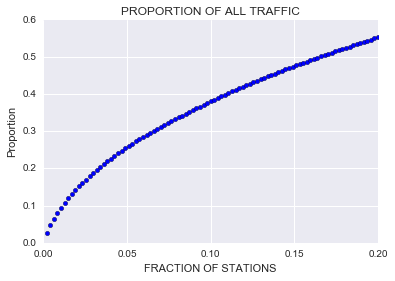

In [744]:
frame = plt.gca()

plt.scatter(to_470, cumulative['total_cumulative'])
plt.ylabel('Proportion')
plt.xlabel('FRACTION OF STATIONS')
plt.title('PROPORTION OF ALL TRAFFIC')
plt.ylim((0,0.6))
plt.xlim((0, 0.2))

# plt.savefig('cumulative_prob_dist_scatter_zoomed.png', dpi = 300, bbox_inches = 'tight')

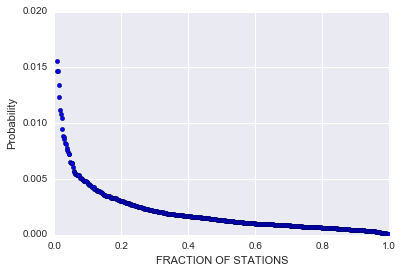

In [745]:
frame = plt.gca()

plt.scatter(to_470, summary_total['p_total'])
plt.ylabel('Probability')
plt.xlabel('FRACTION OF STATIONS')
plt.title('')
plt.ylim((0,0.02))
plt.xlim((0, 1))

plt.savefig('prob_dist_TEST.png', dpi = 300, bbox_inches = 'tight')

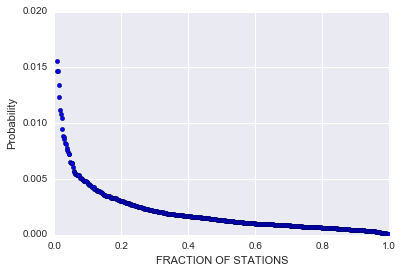

In [746]:
frame = plt.gca()

plt.scatter(to_470, summary_total['p_total'])
plt.ylabel('Probability')
plt.xlabel('FRACTION OF STATIONS')
plt.title('')
plt.ylim((0,0.02))
plt.xlim((0, 1))
# plt.xlabel(size)
plt.savefig('prob_dist_TEST.png', dpi = 300, bbox_inches = 'tight')

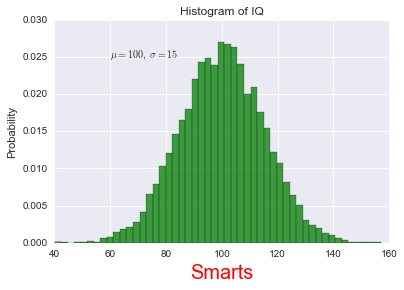

In [747]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='g', alpha=0.75)


plt.xlabel('Smarts', fontsize=20, color='red')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

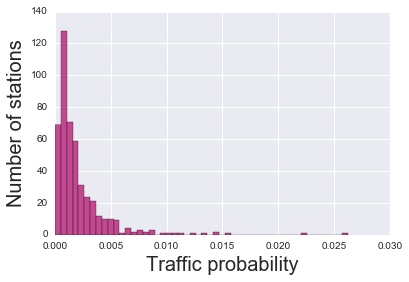

In [748]:
frame = plt.gca()

plt.hist(summary_total['p_total'], bins = 50, color = "#C24890")
plt.ylabel('Number of stations', fontsize = 20)
plt.xlabel('Traffic probability', fontsize = 20)
# plt.text(0.01, 30, r'We look at stations that', fontsize = 14, color = 'blue')
# plt.text(0.01, 20, r'handle the most traffic.', fontsize = 14, color = 'blue')

# plt.savefig('histogram_normalized_by_total_overall_traffic.png', dpi = 300, bbox_inches = 'tight')

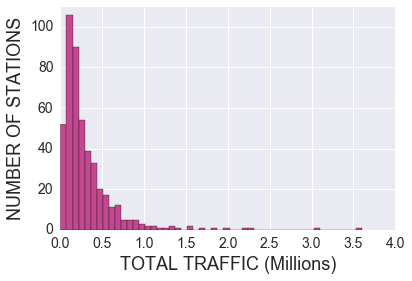

In [749]:
#frame = plt.gca()

#ax = frame.add_subplot(111)

fig = plt.figure(dpi = 300)
ax  = fig.add_subplot(111)

plt.hist(summary_total['total_entry'], bins = 50, color = "#C24890")
plt.ylabel('NUMBER OF STATIONS', fontsize = 18)
plt.xlabel('TOTAL TRAFFIC (Millions)', fontsize = 18)
ax.set_xticklabels(np.arange(0, 4.5, 0.5))
labels = [""]
plt.savefig('histogram_RAW.png', dpi = 300, bbox_inches = 'tight')
plt.ylim((0,110))
plt.tick_params(axis='both', which='major', labelsize=14)

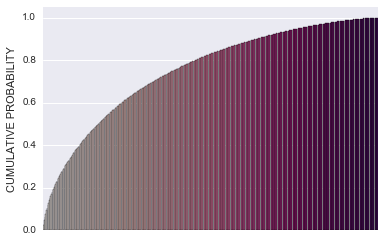

In [750]:
# initial plot - to be refined

frame1 = plt.gca()

sns.barplot(x = 'STATIONLINE', y = 'total_cumulative', data = cumulative, saturation = 0.75, palette = 'RdPu')


#x = cumulative['STATION']
#y = cumulative['total_cumulative']
#plt.plot(y[:10])
#plt.xticks(rotation=90)
#plt.xlabel('')
plt.ylabel('CUMULATIVE PROBABILITY')
#plt.title('CUMULATIVE PROBABILITY DISTRIBUTION')
frame1.axes.get_xaxis().set_visible(False)
plt.ylim((0,1.05))

plt.savefig('cumulative_prob_dist.png', dpi = 300, bbox_inches = 'tight')

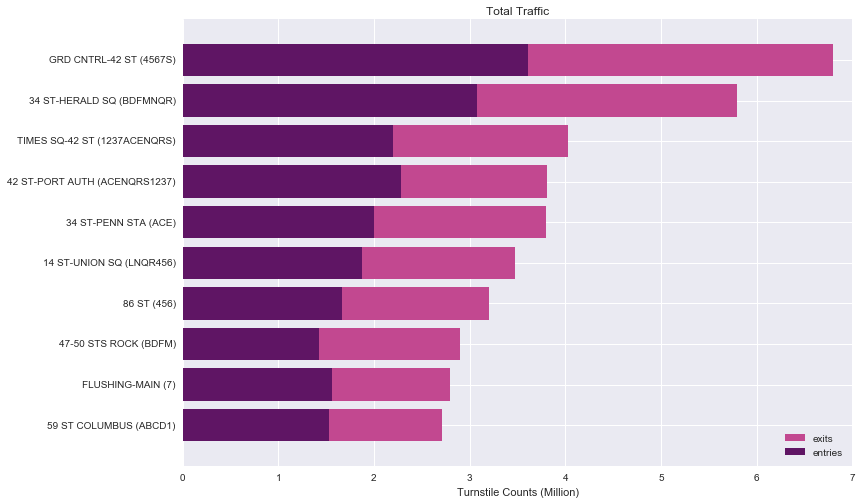

In [751]:
# total traffic for the month, by station - top 10 only, split by entries / exits

fig2 = plt.figure(dpi = 400, figsize = (12, 8))
ax2  = fig2.add_subplot(111)
ax2.barh(range(0, 10), t, color = '#C24890', label = 'exits', align = 'center', edgecolor = "none")
ax2.barh(range(0, 10), t_en, color = '#5F1564', label = 'entries', align = 'center', edgecolor = "none")
ax2.set_yticks(range(0,10))
ax2.set_yticklabels(topstation_name[::-1])
ax2.set_xlabel('Turnstile Counts (Million)')
ax2.set_xticklabels(range(0,8))
plt.ylim(-1, 10)
plt.title('Total Traffic')
plt.legend(loc = 'best');
fig2.savefig('Fig1.png')

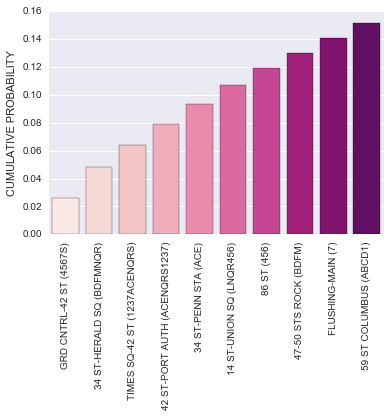

In [752]:
# initial plot - to be refined

#frame2 =plt.gca()
#plt.tight_layout()

fig2 = plt.figure(dpi = 300)
ax1  = fig2.add_subplot(111)

sns.barplot(x = 'STATIONLINE', y = 'total_cumulative', data = cumulative.head(10), saturation = 0.75, palette = 'RdPu')

ax1.set_xlabel('CUMULATIVE PROBABILITY')
ax1.set_xticklabels(topstation_name)
#x = cumulative['STATION']
#y = cumulative['total_cumulative']
#plt.plot(y[:10])
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('CUMULATIVE PROBABILITY')
#ax2.set_yticklabels(topstation_name[::-1])
ax1.set_xticklabels(topstation_name)

#plt.title('CUMULATIVE PROBABILITY DISTRIBUTION')
frame1.axes.get_xaxis().set_visible(False)
plt.ylim((0,0.16))


#plt.savefig('cumul_prob_dist_top10_v2.png', dpi = 300)
fig2.savefig('cumul_prob_dist_top10.png', dpi =300, bbox_inches = 'tight')

### Elaine

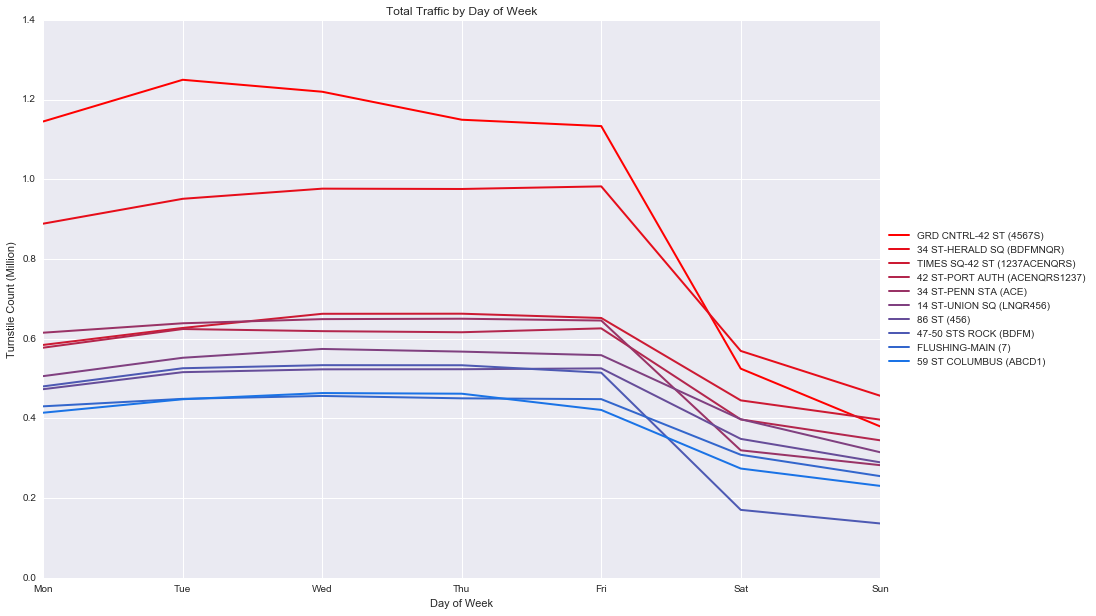

In [754]:
# Total traffic for top 10 stations by day of week

daily_total
fig1 = plt.figure(dpi = 600, figsize = (15, 10))
ax1  = fig1.add_subplot(111)
clr = numpy.arange(0, 1.1, 0.1)

for i in topstation:
    station_total = daily_total[daily_total['STATIONLINE']==i]
    x = numpy.array(station_total['dayofweek'])
    y = numpy.array(station_total['net_sum'])
    index = topstation.index(i)
    c = (clr[10-index], clr[index]/2, clr[index], 1)
    ax1.plot(x,y, label = topstation_name[index], color = c, linewidth = 2.0)
ax1.set_xlabel('Day of Week')
ax1.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
ax1.set_yticklabels(numpy.arange(0.0, 1.6, 0.2))
ax1.set_ylabel('Turnstile Count (Million)')
ax1.set_title('Total Traffic by Day of Week')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));


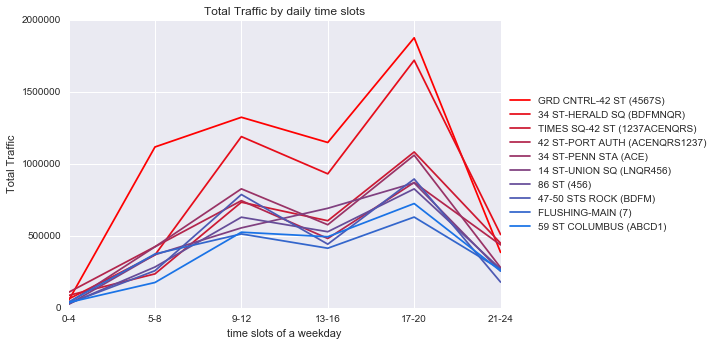

In [755]:
# total traffic for top 10 stations for weekdays by time of day

clr = numpy.arange(0, 1.1, 0.1)

fig1 = plt.figure()
ax1 = fig1.add_axes([0, 0, 1, 1])
for i in topstation:
    station_hour = stationbyhour[stationbyhour['STATIONLINE']==i]
    x = numpy.array(station_hour['hslot'])
    y = numpy.array(station_hour['net_sum'])
    index = topstation.index(i)
    c = (clr[10-index], clr[index]/2, clr[index], 1)
    ax1.plot(x,y, label = topstation_name[index], color = c)
ax1.set_xlabel('time slots of a weekday')
ax1.set_xticklabels(['0-4', '5-8', '9-12', '13-16', '17-20', '21-24'])
ax1.set_ylabel('Total Traffic')
ax1.set_title('Total Traffic by daily time slots')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

### Ting

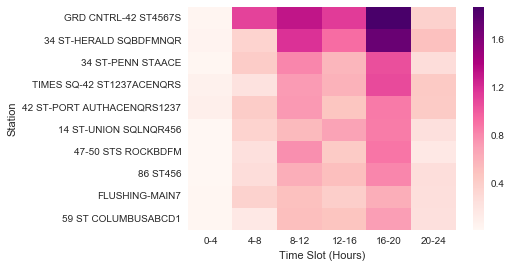

In [779]:
heatmap = sns.heatmap(stationbyhour_piv, cmap = 'RdPu', xticklabels=['0-4','4-8','8-12','12-16','16-20','20-24'])
plot = heatmap.get_figure()
# plot.savefig('Fig3.png', bbox_inches='tight', dpi = 300)

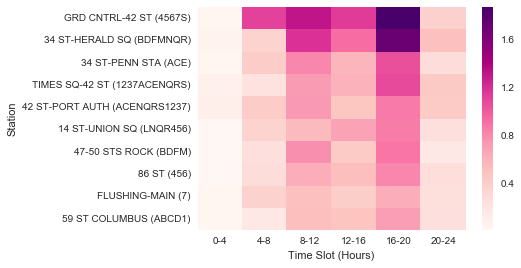

In [780]:
heatmap = sns.heatmap(stationbyhour_piv, cmap = 'RdPu', xticklabels=['0-4','4-8','8-12','12-16','16-20','20-24'],
                      yticklabels = sorted_stations)
plot = heatmap.get_figure()
# plot.savefig('Fig3.png', bbox_inches='tight', dpi = 300)